In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tables as tb

from invisible_cities.cities import components as cp
import invisible_cities.database.load_db

In [2]:
num_files = 101
data_dir = '/Users/taylorcontreras/Development/Research/trackingplane/data/new_sims/'
fast_sims = [data_dir+'fast/hdf5/flex.kr83m.'+str(i)+'.detsim.h5' for i in range(0,num_files)]
full_sims = [data_dir+'full/hdf5/flex.kr83m.'+str(i)+'.buffy.h5' for i in range(0,num_files)]
#db = db.DataSiPM('flexs13p15')

In [2]:
num_files = 101
data_dir = '/Users/taylorcontreras/Development/Research/trackingplane/data/reduced_hdf5/'
fast_sims = [data_dir+'detsim/flex.kr83m.'+str(i)+'.detsim.waveforms.h5' for i in range(0,num_files)]
full_sims = [data_dir+'buffy/flex.kr83m.'+str(i)+'.buffy.waveforms.h5' for i in range(0,num_files)]
database = invisible_cities.database.load_db.DataSiPM('flexs13p15')

In [7]:
fast_data = pd.read_hdf(fast_sims[0], 'SiPM/Waveforms')
full_data = pd.read_hdf(full_sims[0], 'SiPM/Waveforms')
full_mc_data = pd.read_hdf(full_sims[0], 'SiPM/MC')

KeyError: 'No object named SiPM/MC in the file'

In [5]:
full_data #[fast_data.event_id==0]

,event_id,charge,X,Y
0,0,1,-52.5,-472.5
1,0,1,67.5,-472.5
2,0,1,-112.5,-457.5
3,0,1,-97.5,-457.5
4,0,1,-82.5,-457.5
...,...,...,...,...
68525,99,3,67.5,472.5
68526,99,2,82.5,472.5
68527,99,1,97.5,472.5
68528,99,3,112.5,472.5


In [6]:
nfiles = 101
all_fast_data = pd.DataFrame()
all_full_data = pd.DataFrame()
for i in range(0,nfiles):
    all_fast_data = all_fast_data.append(pd.read_hdf(fast_sims[i], 'SiPM/Waveforms'))
    all_full_data = all_full_data.append(pd.read_hdf(full_sims[i], 'SiPM/Waveforms'))

In [7]:
all_fast_data

,event_id,charge,X,Y
0,0,1,277.5,-217.5
1,0,1,307.5,-217.5
2,0,1,397.5,-217.5
3,0,1,187.5,-202.5
4,0,1,247.5,-202.5
...,...,...,...,...
50971,10099,1,142.5,202.5
50972,10099,1,172.5,202.5
50973,10099,1,232.5,202.5
50974,10099,1,82.5,217.5


In [8]:
def Center_of_Event(sipmtable_df, sipm_thresh=0):
    
    event_id = sipmtable_df.event_id[0]
    sipmtable_df = sipmtable_df[sipmtable_df.charge > sipm_thresh]
    x = np.sum(sipmtable_df.charge*sipmtable_df.X)/np.sum(sipmtable_df.charge)
    y = np.sum(sipmtable_df.charge*sipmtable_df.Y)/np.sum(sipmtable_df.charge)
    charge = np.sum(sipmtable_df.charge)
    
    r = np.sqrt(x**2 + y**2)

    return pd.Series({'event_id':event_id, 'charge':charge,'X':x, 'Y':y, 'r':r})

In [9]:
event_centers = all_fast_data.groupby('event_id').apply(lambda grp: Center_of_Event(grp))
full_event_centers = all_full_data.groupby('event_id').apply(lambda grp: Center_of_Event(grp))

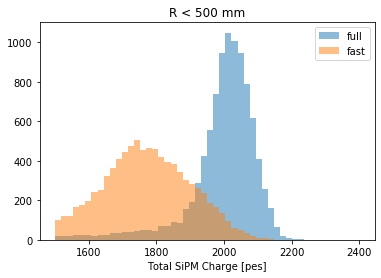

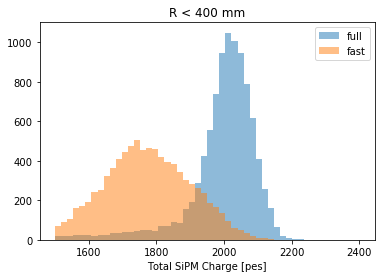

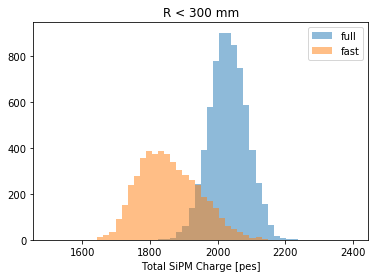

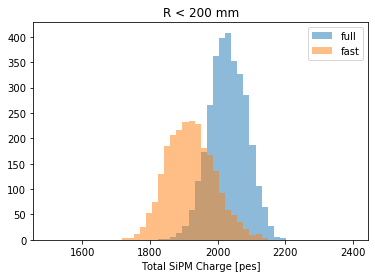

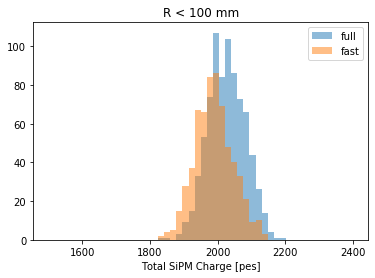

In [10]:
rcuts = [500, 400, 300, 200, 100]
for rcut in rcuts:
    this_range = (1500,2400)
    plt.hist(full_event_centers[full_event_centers.r < rcut].charge, bins=50, label='full', alpha=0.5, range=this_range)
    plt.hist(event_centers[event_centers.r < rcut].charge, bins=50, label='fast', alpha=0.5, range=this_range)
    plt.legend()
    plt.xlabel('Total SiPM Charge [pes]')
    plt.title(f'R < {rcut} mm')
    plt.show()

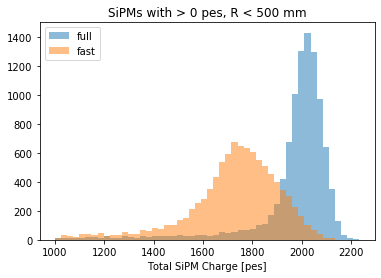

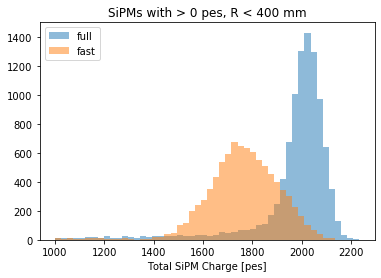

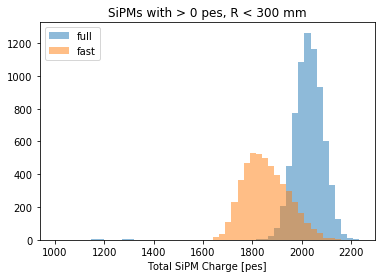

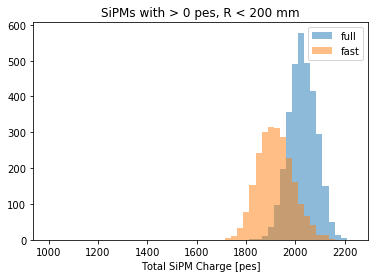

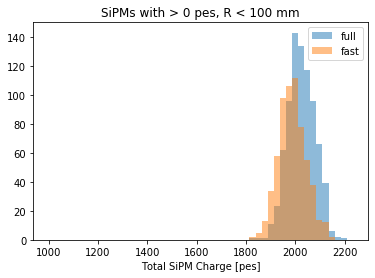

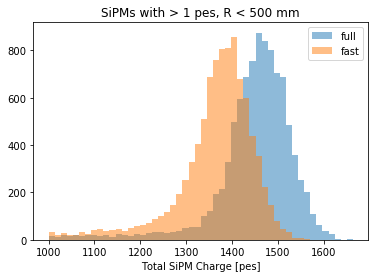

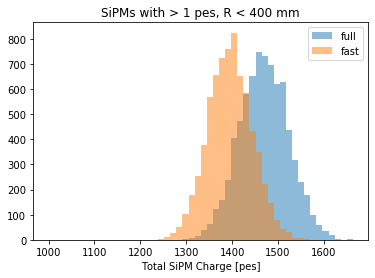

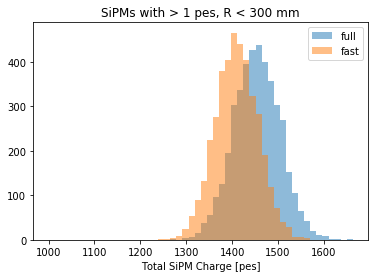

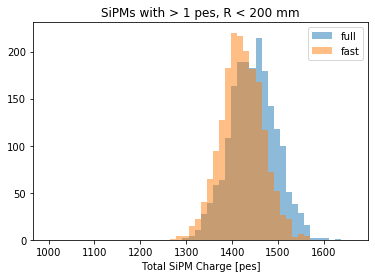

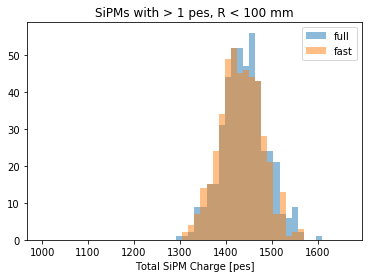

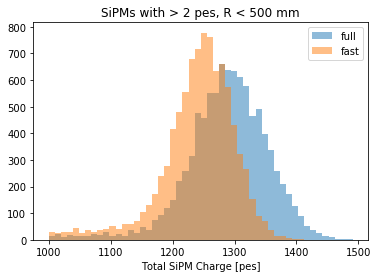

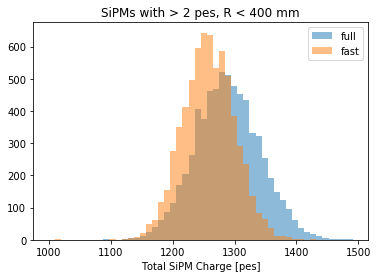

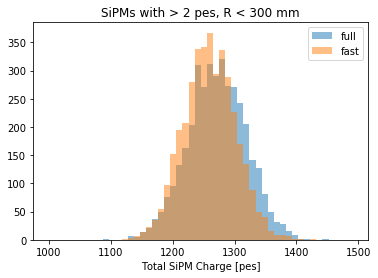

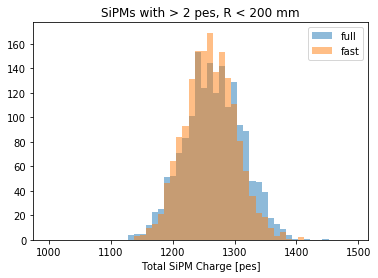

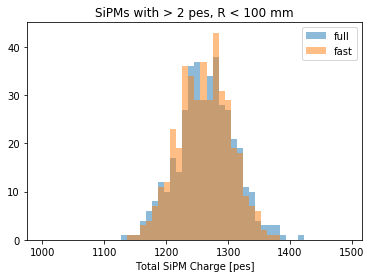

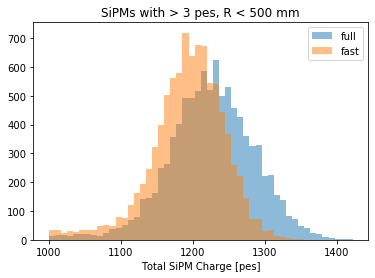

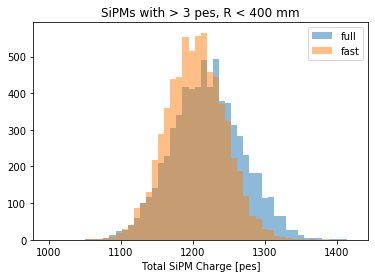

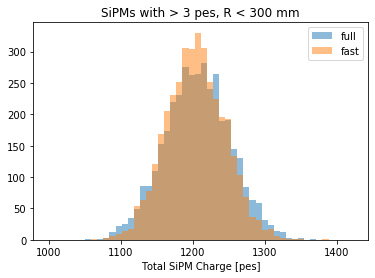

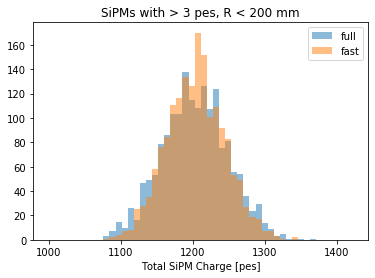

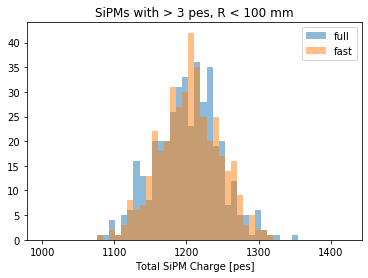

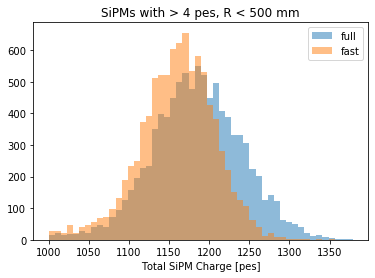

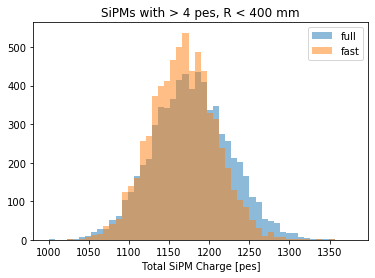

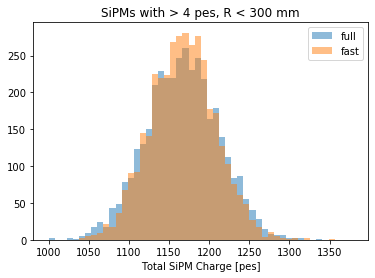

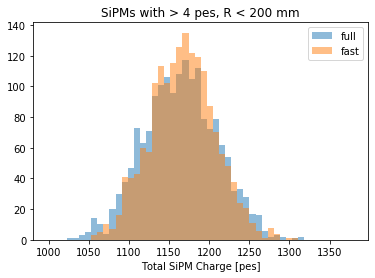

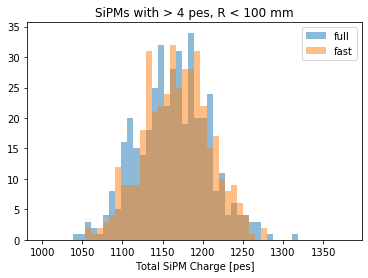

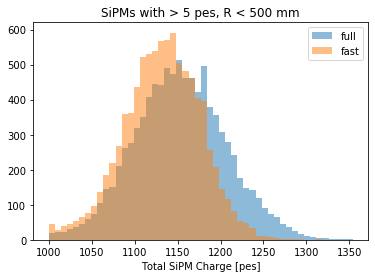

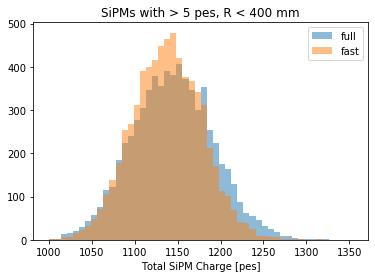

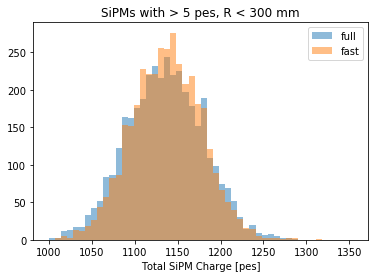

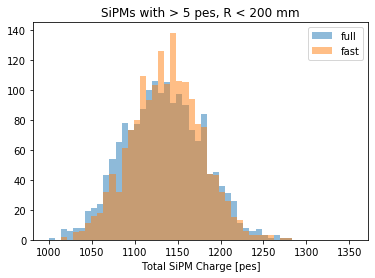

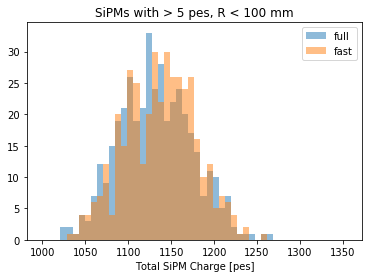

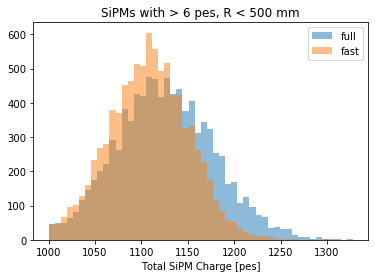

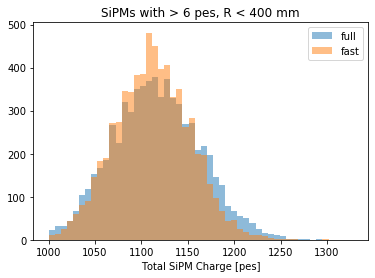

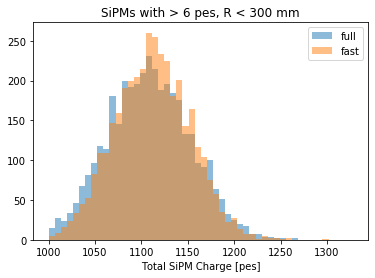

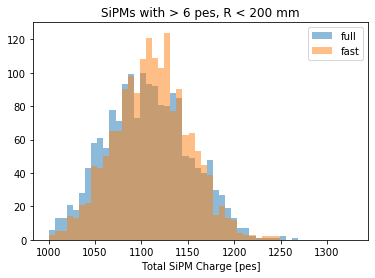

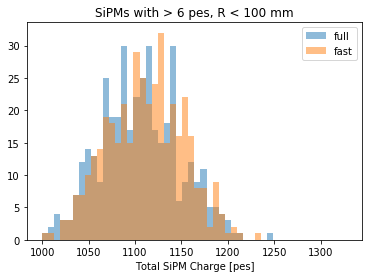

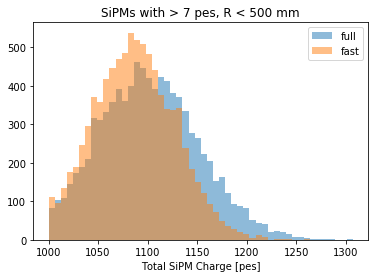

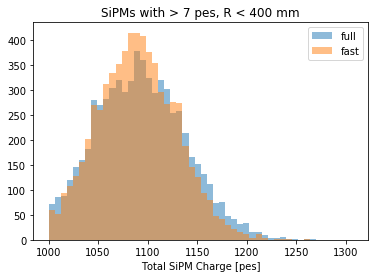

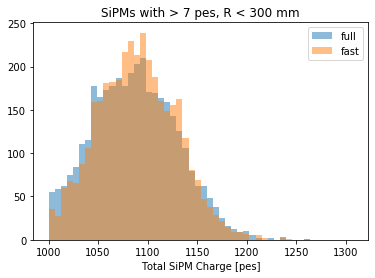

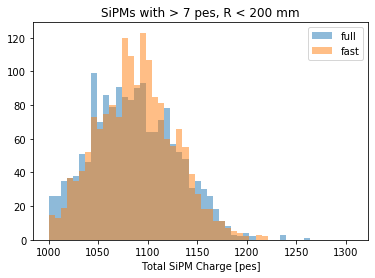

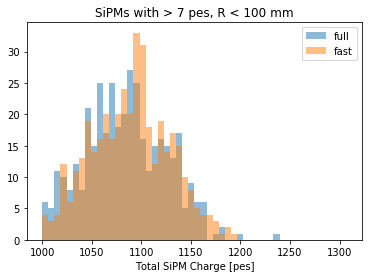

In [11]:
sipm_thresholds = [0,1,2,3,4,5,6,7]
rcuts = [500, 400, 300, 200, 100]
for sipm_thresh in sipm_thresholds:
    event_centers = all_fast_data.groupby('event_id').apply(lambda grp: Center_of_Event(grp, sipm_thresh))
    full_event_centers = all_full_data.groupby('event_id').apply(lambda grp: Center_of_Event(grp, sipm_thresh))

    for rcut in rcuts:
        this_range = (1000,full_event_centers.charge.max())
        plt.hist(full_event_centers[full_event_centers.r < rcut].charge, bins=50, label='full', alpha=0.5, range=this_range)
        plt.hist(event_centers[event_centers.r < rcut].charge, bins=50, label='fast', alpha=0.5, range=this_range)
        plt.legend()
        plt.xlabel('Total SiPM Charge [pes]')
        plt.title(f'SiPMs with > {sipm_thresh} pes, R < {rcut} mm')
        plt.show()

No handles with labels found to put in legend.


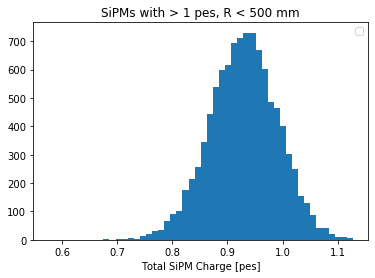

In [12]:
sipm_thresh = 1
rcut = 500
event_centers = all_fast_data.groupby('event_id').apply(lambda grp: Center_of_Event(grp, sipm_thresh))
full_event_centers = all_full_data.groupby('event_id').apply(lambda grp: Center_of_Event(grp, sipm_thresh))

Q = event_centers.charge / full_event_centers.charge
this_range = (600,full_event_centers.charge.max())
plt.hist(Q, bins=50, label='')#, range=this_range)
plt.legend()
plt.xlabel('Total SiPM Charge [pes]')
plt.title(f'SiPMs with > {sipm_thresh} pes, R < {rcut} mm')
plt.show()

In [16]:
event_centers = all_fast_data.groupby('event_id').apply(lambda grp: Center_of_Event(grp, sipm_thresh))
full_event_centers = all_full_data.groupby('event_id').apply(lambda grp: Center_of_Event(grp, sipm_thresh))
rcuts = [500, 400, 300, 200]
range = (-1.0,2.0)
Qs = []
for rcut in rcuts:
    Q = event_centers[event_centers.r < rcut].charge / full_event_centers[full_event_centers.r < rcut].charge
    Qs.append(Q)

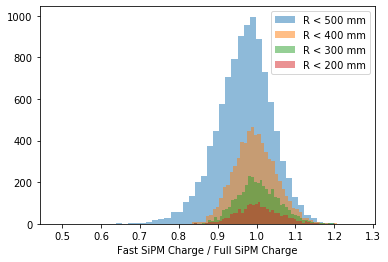

In [18]:
for Q,rcut in zip(Qs,rcuts):
    plt.hist(Q, bins=50, label=f'R < {rcut} mm', alpha=.5)
plt.legend()
plt.xlabel('Fast SiPM Charge / Full SiPM Charge')
plt.show()

In [19]:
sipm_thresholds = [0,1,2,3,4,5]
rcut = 500
Qs = []
for sipm_thresh in sipm_thresholds:
    event_centers = all_fast_data.groupby('event_id').apply(lambda grp: Center_of_Event(grp, sipm_thresh))
    full_event_centers = all_full_data.groupby('event_id').apply(lambda grp: Center_of_Event(grp, sipm_thresh))

    Q = event_centers.charge / full_event_centers.charge
    Qs.append(Q)

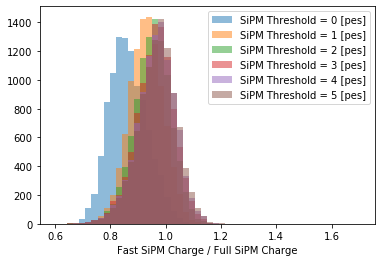

In [21]:
for Q,sipm_thresh in zip(Qs,sipm_thresholds):
    plt.hist(Q, bins=50, range=(0.6,1.7),label=f'SiPM Threshold = {sipm_thresh} [pes]', alpha=0.5)

plt.legend()
plt.xlabel('Fast SiPM Charge / Full SiPM Charge')
plt.show()

In [26]:
all_fast_data[all_fast_data.event_id==0]

,event_id,charge,X,Y
0,0,1,277.5,-217.5
1,0,1,307.5,-217.5
2,0,1,397.5,-217.5
3,0,1,187.5,-202.5
4,0,1,247.5,-202.5
...,...,...,...,...
425,0,1,-112.5,457.5
426,0,1,-22.5,457.5
427,0,1,-97.5,472.5
428,0,1,-67.5,472.5


In [6]:
from invisible_cities.reco import xy_algorithms as xya

In [8]:
sipm_xs    = database.X.values
sipm_ys    = database.Y.values
sipm_xys   = np.stack((sipm_xs, sipm_ys), axis=1)

In [4]:
num_files = 101
data_dir = '/Users/taylorcontreras/Development/Research/trackingplane/data/reduced/'
fast_sims = [data_dir+'detsim_reduced/flex.kr83m.'+str(i)+'.detsim.reduced.h5' for i in range(0,num_files)]
full_sims = [data_dir+'buffy_reduced/flex.kr83m.'+str(i)+'.buffy.reduced.h5' for i in range(0,num_files)]
database = invisible_cities.database.load_db.DataSiPM('flexs13p15')

In [14]:
fast_data = pd.read_hdf(fast_sims[0], 'SiPM/Waveforms')
full_data = pd.read_hdf(full_sims[0], 'SiPM/Waveforms')

In [15]:
fast_data

,event_id,charge,X,Y,Z,sensor_id
0,0.0,1.0,277.5,-217.5,1300.0,1763.0
1,0.0,1.0,307.5,-217.5,1304.0,1765.0
2,0.0,1.0,397.5,-217.5,1299.0,1771.0
3,0.0,1.0,187.5,-202.5,1300.0,1816.0
4,0.0,1.0,247.5,-202.5,1305.0,1820.0
...,...,...,...,...,...,...
50040,99.0,43.0,157.5,457.5,721.0,4289.0
50041,99.0,1.0,-37.5,472.5,727.0,4295.0
50042,99.0,1.0,52.5,472.5,724.0,4301.0
50043,99.0,1.0,97.5,472.5,729.0,4304.0


In [27]:
event = fast_data[fast_data.event_id==0]
max_sipm = event.sensor_id[np.argmax(event.charge)]

In [80]:
event[event.charge==event.charge.max()].sensor_id.tolist()[0]

3355.0

In [28]:
event[event.sensor_id==max_sipm]

,event_id,charge,X,Y,Z,sensor_id
300,0.0,109.0,262.5,277.5,1295.0,3804.0


In [32]:
database[database.SensorID==max_sipm]

,SensorID,ChannelID,Active,X,Y,adc_to_pes,Sigma
2804,3804,3804,1,262.5,277.5,17.25,1.677


In [34]:
np.shape(sipm_xys)

(3308, 2)

In [40]:
d_cut = 20.
within_lm_radius = xya.get_nearby_sipm_inds(sipm_xys[int(max_sipm)-1000], d_cut, sipm_xys)

In [41]:
within_lm_radius

array([2750, 2803, 2804, 2805, 2857])

In [55]:
events = fast_data.groupby('event_id')
max_sipms = np.array(events.apply(lambda grp: grp.sensor_id[np.argmax(grp.charge)])).astype(int)-1000

In [54]:
d_cut = 20.
within_lm_radius = xya.get_nearby_sipm_inds(sipm_xys[max_sipms], d_cut, sipm_xys)

ValueError: operands could not be broadcast together with shapes (3308,2) (100,2) 

In [116]:
dcuts = [20, 100, 500, 1000]
dcharges = []
for dcut in dcuts:
    nfiles = 100
    nevents = 100
    dcharge = []
    for file in range(nfiles):
        fast_data = pd.read_hdf(fast_sims[file], 'SiPM/Waveforms')
        full_data = pd.read_hdf(full_sims[file], 'SiPM/Waveforms')
        for evt in range(nevents):
            event = fast_data[fast_data.event_id==evt]
            if len(event) > 0:
                max_sipm = int(event[event.charge==event.charge.max()].sensor_id.tolist()[0])
                within_lm_radius = xya.get_nearby_sipm_inds(sipm_xys[int(max_sipm)-1000], dcut, sipm_xys)
                sipms_within_lm = event[event.sensor_id.isin(within_lm_radius+1000)]
                charge_fast = sipms_within_lm.charge.sum()
                #print(evt, max_sipm, len(sipms_within_lm), charge_fast, dcut)

                event = full_data[full_data.event_id==evt]
                max_sipm = int(event[event.charge==event.charge.max()].sensor_id.tolist()[0])
                within_lm_radius = xya.get_nearby_sipm_inds(sipm_xys[int(max_sipm)-1000], dcut, sipm_xys)
                sipms_within_lm = event[event.sensor_id.isin(within_lm_radius+1000)]
                #print(dcut)
                #print(sipms_within_lm)
                charge_full = sipms_within_lm.charge.sum()

                dcharge.append(charge_fast - charge_full)
    dcharges.append(dcharge)

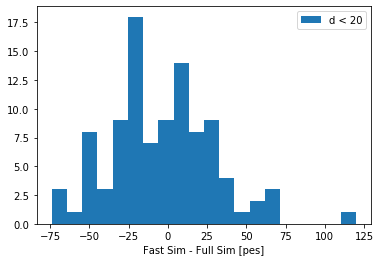

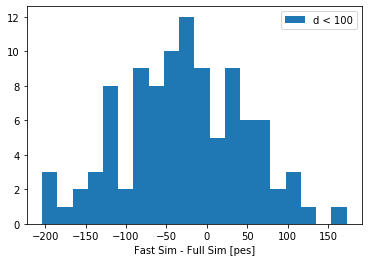

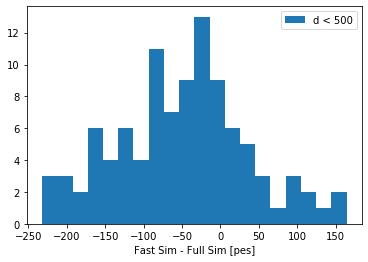

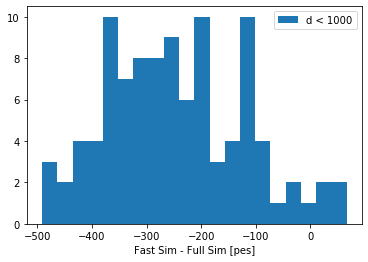

In [117]:
for dcut in range(len(dcuts)):
    plt.hist(dcharges[dcut], bins=20, label='d < '+str(dcuts[dcut]))
    plt.xlabel('Fast Sim - Full Sim [pes]')
    plt.legend()
    plt.show()

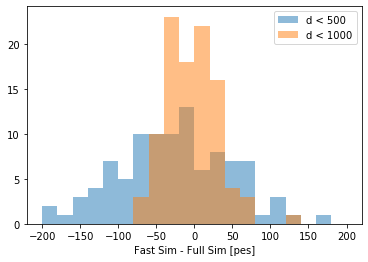

In [130]:
sub_dcuts = dcuts[2:]
for dcut in range(len(sub_dcuts)):
    plt.hist(dcharges[len(sub_dcuts)-1-dcut], bins=20, range=(-200,200), label='d < '+str(sub_dcuts[dcut]), alpha=0.5)
plt.xlabel('Fast Sim - Full Sim [pes]')
plt.legend()
plt.show()

In [31]:
dcuts = [20, 100, 500, 1000]
dcharges = []
for dcut in dcuts:
    nfiles = 100
    nevents = 100
    dcharge = []
    print('dcut', dcut)
    start_event = 0
    for file in range(nfiles):
        fast_data = pd.read_hdf(fast_sims[file], 'SiPM/Waveforms')
        full_data = pd.read_hdf(full_sims[file], 'SiPM/Waveforms')
        print('file',file)
        for evt in range(nevents):
            this_event = evt + start_event
            event = fast_data[fast_data.event_id==this_event]
            #print('event',evt)
            if len(event) > 0:
                max_sipm = int(event[event.charge==event.charge.max()].sensor_id.tolist()[0])
                within_lm_radius = xya.get_nearby_sipm_inds(sipm_xys[int(max_sipm)-1000], dcut, sipm_xys)
                sipms_within_lm = event[event.sensor_id.isin(within_lm_radius+1000)]
                charge_fast = sipms_within_lm.charge.sum()
                #print(evt, max_sipm, len(sipms_within_lm), charge_fast, dcut)

                event = full_data[full_data.event_id==this_event]
                max_sipm = int(event[event.charge==event.charge.max()].sensor_id.tolist()[0])
                within_lm_radius = xya.get_nearby_sipm_inds(sipm_xys[int(max_sipm)-1000], dcut, sipm_xys)
                sipms_within_lm = event[event.sensor_id.isin(within_lm_radius+1000)]
                #print(dcut)
                #print(sipms_within_lm)
                charge_full = sipms_within_lm.charge.sum()
                print('Event  >0', file, this_event)
                dcharge.append(charge_fast/charge_full)
            else:
                print('event ! > 0:', this_event)
                print('  fast event_id:',fast_data.event_id)
        start_event += evt
    dcharges.append(dcharge)

dcut 20
file 0
Event  >0 0 0
Event  >0 0 1
Event  >0 0 2
Event  >0 0 3
Event  >0 0 4
Event  >0 0 5
Event  >0 0 6
Event  >0 0 7
Event  >0 0 8
Event  >0 0 9
Event  >0 0 10
Event  >0 0 11
Event  >0 0 12
Event  >0 0 13
Event  >0 0 14
Event  >0 0 15
Event  >0 0 16
Event  >0 0 17
Event  >0 0 18
Event  >0 0 19
Event  >0 0 20
Event  >0 0 21
Event  >0 0 22
Event  >0 0 23
Event  >0 0 24
Event  >0 0 25
Event  >0 0 26
Event  >0 0 27
Event  >0 0 28
Event  >0 0 29
Event  >0 0 30
Event  >0 0 31
Event  >0 0 32
Event  >0 0 33
Event  >0 0 34
Event  >0 0 35
Event  >0 0 36
Event  >0 0 37
Event  >0 0 38
Event  >0 0 39
Event  >0 0 40
Event  >0 0 41
Event  >0 0 42
Event  >0 0 43
Event  >0 0 44
Event  >0 0 45
Event  >0 0 46
Event  >0 0 47
Event  >0 0 48
Event  >0 0 49
Event  >0 0 50
Event  >0 0 51
Event  >0 0 52
Event  >0 0 53
Event  >0 0 54
Event  >0 0 55
Event  >0 0 56
Event  >0 0 57
Event  >0 0 58
Event  >0 0 59
Event  >0 0 60
Event  >0 0 61
Event  >0 0 62
Event  >0 0 63
Event  >0 0 64
Event  >0 0 65
Event

Name: event_id, Length: 48398, dtype: float64
event ! > 0: 146
  fast event_id: 0        10000.0
1        10000.0
2        10000.0
3        10000.0
4        10000.0
          ...   
48393      199.0
48394      199.0
48395      199.0
48396      199.0
48397      199.0
Name: event_id, Length: 48398, dtype: float64
event ! > 0: 147
  fast event_id: 0        10000.0
1        10000.0
2        10000.0
3        10000.0
4        10000.0
          ...   
48393      199.0
48394      199.0
48395      199.0
48396      199.0
48397      199.0
Name: event_id, Length: 48398, dtype: float64
event ! > 0: 148
  fast event_id: 0        10000.0
1        10000.0
2        10000.0
3        10000.0
4        10000.0
          ...   
48393      199.0
48394      199.0
48395      199.0
48396      199.0
48397      199.0
Name: event_id, Length: 48398, dtype: float64
event ! > 0: 149
  fast event_id: 0        10000.0
1        10000.0
2        10000.0
3        10000.0
4        10000.0
          ...   
48393      199.0


Name: event_id, Length: 49758, dtype: float64
event ! > 0: 205
  fast event_id: 0        20000.0
1        20000.0
2        20000.0
3        20000.0
4        20000.0
          ...   
49753      299.0
49754      299.0
49755      299.0
49756      299.0
49757      299.0
Name: event_id, Length: 49758, dtype: float64
event ! > 0: 206
  fast event_id: 0        20000.0
1        20000.0
2        20000.0
3        20000.0
4        20000.0
          ...   
49753      299.0
49754      299.0
49755      299.0
49756      299.0
49757      299.0
Name: event_id, Length: 49758, dtype: float64
event ! > 0: 207
  fast event_id: 0        20000.0
1        20000.0
2        20000.0
3        20000.0
4        20000.0
          ...   
49753      299.0
49754      299.0
49755      299.0
49756      299.0
49757      299.0
Name: event_id, Length: 49758, dtype: float64
event ! > 0: 208
  fast event_id: 0        20000.0
1        20000.0
2        20000.0
3        20000.0
4        20000.0
          ...   
49753      299.0


Name: event_id, Length: 49758, dtype: float64
event ! > 0: 285
  fast event_id: 0        20000.0
1        20000.0
2        20000.0
3        20000.0
4        20000.0
          ...   
49753      299.0
49754      299.0
49755      299.0
49756      299.0
49757      299.0
Name: event_id, Length: 49758, dtype: float64
event ! > 0: 286
  fast event_id: 0        20000.0
1        20000.0
2        20000.0
3        20000.0
4        20000.0
          ...   
49753      299.0
49754      299.0
49755      299.0
49756      299.0
49757      299.0
Name: event_id, Length: 49758, dtype: float64
event ! > 0: 287
  fast event_id: 0        20000.0
1        20000.0
2        20000.0
3        20000.0
4        20000.0
          ...   
49753      299.0
49754      299.0
49755      299.0
49756      299.0
49757      299.0
Name: event_id, Length: 49758, dtype: float64
event ! > 0: 288
  fast event_id: 0        20000.0
1        20000.0
2        20000.0
3        20000.0
4        20000.0
          ...   
49753      299.0


event ! > 0: 351
  fast event_id: 0        30000.0
1        30000.0
2        30000.0
3        30000.0
4        30000.0
          ...   
48682      399.0
48683      399.0
48684      399.0
48685      399.0
48686      399.0
Name: event_id, Length: 48687, dtype: float64
event ! > 0: 352
  fast event_id: 0        30000.0
1        30000.0
2        30000.0
3        30000.0
4        30000.0
          ...   
48682      399.0
48683      399.0
48684      399.0
48685      399.0
48686      399.0
Name: event_id, Length: 48687, dtype: float64
event ! > 0: 353
  fast event_id: 0        30000.0
1        30000.0
2        30000.0
3        30000.0
4        30000.0
          ...   
48682      399.0
48683      399.0
48684      399.0
48685      399.0
48686      399.0
Name: event_id, Length: 48687, dtype: float64
event ! > 0: 354
  fast event_id: 0        30000.0
1        30000.0
2        30000.0
3        30000.0
4        30000.0
          ...   
48682      399.0
48683      399.0
48684      399.0
48685      3

event ! > 0: 409
  fast event_id: 0        40000.0
1        40000.0
2        40000.0
3        40000.0
4        40000.0
          ...   
50279      499.0
50280      499.0
50281      499.0
50282      499.0
50283      499.0
Name: event_id, Length: 50284, dtype: float64
event ! > 0: 410
  fast event_id: 0        40000.0
1        40000.0
2        40000.0
3        40000.0
4        40000.0
          ...   
50279      499.0
50280      499.0
50281      499.0
50282      499.0
50283      499.0
Name: event_id, Length: 50284, dtype: float64
event ! > 0: 411
  fast event_id: 0        40000.0
1        40000.0
2        40000.0
3        40000.0
4        40000.0
          ...   
50279      499.0
50280      499.0
50281      499.0
50282      499.0
50283      499.0
Name: event_id, Length: 50284, dtype: float64
event ! > 0: 412
  fast event_id: 0        40000.0
1        40000.0
2        40000.0
3        40000.0
4        40000.0
          ...   
50279      499.0
50280      499.0
50281      499.0
50282      4

Name: event_id, Length: 50284, dtype: float64
event ! > 0: 489
  fast event_id: 0        40000.0
1        40000.0
2        40000.0
3        40000.0
4        40000.0
          ...   
50279      499.0
50280      499.0
50281      499.0
50282      499.0
50283      499.0
Name: event_id, Length: 50284, dtype: float64
event ! > 0: 490
  fast event_id: 0        40000.0
1        40000.0
2        40000.0
3        40000.0
4        40000.0
          ...   
50279      499.0
50280      499.0
50281      499.0
50282      499.0
50283      499.0
Name: event_id, Length: 50284, dtype: float64
event ! > 0: 491
  fast event_id: 0        40000.0
1        40000.0
2        40000.0
3        40000.0
4        40000.0
          ...   
50279      499.0
50280      499.0
50281      499.0
50282      499.0
50283      499.0
Name: event_id, Length: 50284, dtype: float64
event ! > 0: 492
  fast event_id: 0        40000.0
1        40000.0
2        40000.0
3        40000.0
4        40000.0
          ...   
50279      499.0


Name: event_id, Length: 49615, dtype: float64
event ! > 0: 544
  fast event_id: 0        50000.0
1        50000.0
2        50000.0
3        50000.0
4        50000.0
          ...   
49610      599.0
49611      599.0
49612      599.0
49613      599.0
49614      599.0
Name: event_id, Length: 49615, dtype: float64
event ! > 0: 545
  fast event_id: 0        50000.0
1        50000.0
2        50000.0
3        50000.0
4        50000.0
          ...   
49610      599.0
49611      599.0
49612      599.0
49613      599.0
49614      599.0
Name: event_id, Length: 49615, dtype: float64
event ! > 0: 546
  fast event_id: 0        50000.0
1        50000.0
2        50000.0
3        50000.0
4        50000.0
          ...   
49610      599.0
49611      599.0
49612      599.0
49613      599.0
49614      599.0
Name: event_id, Length: 49615, dtype: float64
event ! > 0: 547
  fast event_id: 0        50000.0
1        50000.0
2        50000.0
3        50000.0
4        50000.0
          ...   
49610      599.0


Name: event_id, Length: 47425, dtype: float64
event ! > 0: 598
  fast event_id: 0        60000.0
1        60000.0
2        60000.0
3        60000.0
4        60000.0
          ...   
47420      699.0
47421      699.0
47422      699.0
47423      699.0
47424      699.0
Name: event_id, Length: 47425, dtype: float64
event ! > 0: 599
  fast event_id: 0        60000.0
1        60000.0
2        60000.0
3        60000.0
4        60000.0
          ...   
47420      699.0
47421      699.0
47422      699.0
47423      699.0
47424      699.0
Name: event_id, Length: 47425, dtype: float64
event ! > 0: 600
  fast event_id: 0        60000.0
1        60000.0
2        60000.0
3        60000.0
4        60000.0
          ...   
47420      699.0
47421      699.0
47422      699.0
47423      699.0
47424      699.0
Name: event_id, Length: 47425, dtype: float64
event ! > 0: 601
  fast event_id: 0        60000.0
1        60000.0
2        60000.0
3        60000.0
4        60000.0
          ...   
47420      699.0


Name: event_id, Length: 47425, dtype: float64
event ! > 0: 661
  fast event_id: 0        60000.0
1        60000.0
2        60000.0
3        60000.0
4        60000.0
          ...   
47420      699.0
47421      699.0
47422      699.0
47423      699.0
47424      699.0
Name: event_id, Length: 47425, dtype: float64
event ! > 0: 662
  fast event_id: 0        60000.0
1        60000.0
2        60000.0
3        60000.0
4        60000.0
          ...   
47420      699.0
47421      699.0
47422      699.0
47423      699.0
47424      699.0
Name: event_id, Length: 47425, dtype: float64
event ! > 0: 663
  fast event_id: 0        60000.0
1        60000.0
2        60000.0
3        60000.0
4        60000.0
          ...   
47420      699.0
47421      699.0
47422      699.0
47423      699.0
47424      699.0
Name: event_id, Length: 47425, dtype: float64
event ! > 0: 664
  fast event_id: 0        60000.0
1        60000.0
2        60000.0
3        60000.0
4        60000.0
          ...   
47420      699.0


Name: event_id, Length: 48461, dtype: float64
event ! > 0: 717
  fast event_id: 0        70000.0
1        70000.0
2        70000.0
3        70000.0
4        70000.0
          ...   
48456      799.0
48457      799.0
48458      799.0
48459      799.0
48460      799.0
Name: event_id, Length: 48461, dtype: float64
event ! > 0: 718
  fast event_id: 0        70000.0
1        70000.0
2        70000.0
3        70000.0
4        70000.0
          ...   
48456      799.0
48457      799.0
48458      799.0
48459      799.0
48460      799.0
Name: event_id, Length: 48461, dtype: float64
event ! > 0: 719
  fast event_id: 0        70000.0
1        70000.0
2        70000.0
3        70000.0
4        70000.0
          ...   
48456      799.0
48457      799.0
48458      799.0
48459      799.0
48460      799.0
Name: event_id, Length: 48461, dtype: float64
event ! > 0: 720
  fast event_id: 0        70000.0
1        70000.0
2        70000.0
3        70000.0
4        70000.0
          ...   
48456      799.0


Name: event_id, Length: 48461, dtype: float64
event ! > 0: 792
  fast event_id: 0        70000.0
1        70000.0
2        70000.0
3        70000.0
4        70000.0
          ...   
48456      799.0
48457      799.0
48458      799.0
48459      799.0
48460      799.0
Name: event_id, Length: 48461, dtype: float64
file 8
event ! > 0: 792
  fast event_id: 0        80000.0
1        80000.0
2        80000.0
3        80000.0
4        80000.0
          ...   
49966      899.0
49967      899.0
49968      899.0
49969      899.0
49970      899.0
Name: event_id, Length: 49971, dtype: float64
event ! > 0: 793
  fast event_id: 0        80000.0
1        80000.0
2        80000.0
3        80000.0
4        80000.0
          ...   
49966      899.0
49967      899.0
49968      899.0
49969      899.0
49970      899.0
Name: event_id, Length: 49971, dtype: float64
event ! > 0: 794
  fast event_id: 0        80000.0
1        80000.0
2        80000.0
3        80000.0
4        80000.0
          ...   
49966     

Name: event_id, Length: 49971, dtype: float64
event ! > 0: 850
  fast event_id: 0        80000.0
1        80000.0
2        80000.0
3        80000.0
4        80000.0
          ...   
49966      899.0
49967      899.0
49968      899.0
49969      899.0
49970      899.0
Name: event_id, Length: 49971, dtype: float64
event ! > 0: 851
  fast event_id: 0        80000.0
1        80000.0
2        80000.0
3        80000.0
4        80000.0
          ...   
49966      899.0
49967      899.0
49968      899.0
49969      899.0
49970      899.0
Name: event_id, Length: 49971, dtype: float64
event ! > 0: 852
  fast event_id: 0        80000.0
1        80000.0
2        80000.0
3        80000.0
4        80000.0
          ...   
49966      899.0
49967      899.0
49968      899.0
49969      899.0
49970      899.0
Name: event_id, Length: 49971, dtype: float64
event ! > 0: 853
  fast event_id: 0        80000.0
1        80000.0
2        80000.0
3        80000.0
4        80000.0
          ...   
49966      899.0


Name: event_id, Length: 49428, dtype: float64
event ! > 0: 905
  fast event_id: 0        90000.0
1        90000.0
2        90000.0
3        90000.0
4        90000.0
          ...   
49423      999.0
49424      999.0
49425      999.0
49426      999.0
49427      999.0
Name: event_id, Length: 49428, dtype: float64
event ! > 0: 906
  fast event_id: 0        90000.0
1        90000.0
2        90000.0
3        90000.0
4        90000.0
          ...   
49423      999.0
49424      999.0
49425      999.0
49426      999.0
49427      999.0
Name: event_id, Length: 49428, dtype: float64
event ! > 0: 907
  fast event_id: 0        90000.0
1        90000.0
2        90000.0
3        90000.0
4        90000.0
          ...   
49423      999.0
49424      999.0
49425      999.0
49426      999.0
49427      999.0
Name: event_id, Length: 49428, dtype: float64
event ! > 0: 908
  fast event_id: 0        90000.0
1        90000.0
2        90000.0
3        90000.0
4        90000.0
          ...   
49423      999.0


Name: event_id, Length: 49428, dtype: float64
event ! > 0: 988
  fast event_id: 0        90000.0
1        90000.0
2        90000.0
3        90000.0
4        90000.0
          ...   
49423      999.0
49424      999.0
49425      999.0
49426      999.0
49427      999.0
Name: event_id, Length: 49428, dtype: float64
event ! > 0: 989
  fast event_id: 0        90000.0
1        90000.0
2        90000.0
3        90000.0
4        90000.0
          ...   
49423      999.0
49424      999.0
49425      999.0
49426      999.0
49427      999.0
Name: event_id, Length: 49428, dtype: float64
event ! > 0: 990
  fast event_id: 0        90000.0
1        90000.0
2        90000.0
3        90000.0
4        90000.0
          ...   
49423      999.0
49424      999.0
49425      999.0
49426      999.0
49427      999.0
Name: event_id, Length: 49428, dtype: float64
file 10
event ! > 0: 990
  fast event_id: 0        100000.0
1        100000.0
2        100000.0
3        100000.0
4        100000.0
           ...   
499

KeyboardInterrupt: 

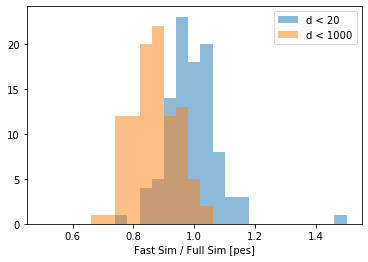

In [11]:
plt.hist(dcharges[0], bins=25, range=(0.5,1.5), label='d < '+str(dcuts[0]), alpha=0.5)
plt.hist(dcharges[-1], bins=25, range=(0.5,1.5), label='d < '+str(dcuts[-1]), alpha=0.5)
plt.xlabel('Fast Sim / Full Sim [pes]')
plt.legend()
plt.show()

In [14]:
len(dcharges[0])

100

In [15]:
nevents

100

In [16]:
nfiles

100

In [23]:
np.shape(dcharges)

(4, 100)

In [34]:
fast_data = pd.read_hdf(fast_sims[1], 'SiPM/Waveforms')

In [37]:
fast_data.event_id.to_list()

[10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
